<a href="https://colab.research.google.com/github/jh0n3/at01/blob/master/emergentesP50_corrClean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dados de Árvores emergentes na Amazônia Brasileira**

* Dataset contendo atributos oriundos de um Modelo Digital de Terreno (MDT) bem como a localização de árvores que se elevam além do dossel florestal, ditas árvores emergentes, na Amazônia brasileira.
* Os atributos topográfico (numéricos) são:
 * Elevação (altitude) - DTM
 * Indice Topográfico de Umidade - TWI
 * Declividade - SLP
 * Aspecto (azimute da declividade) - ASP
 * Distância horizontal até o corpo dágua mais próximo - HDI
 * Distância vartical até o corpo dágua mais próximo - VDI
 * Índice de Roustez Topográfica - RGX
 * Índice de Posição Topográfica - TPI
 * Índice de Convergência Topográfica - TCI
 * Direção de Fluxo de água - DIR
 * Índice de Rugosidade Topográfica - TRI
* 632 instâncias

* O dataset está balanceado, pois existem 50% de ocorrenica de Arvores Emergentes (AE) e 50% de Arvores nãop Emergentes (ANE)

**Montando o ambiente no Google Drive**


In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## 1. Importar bibliotecas necessárias

In [3]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

## 2. Lendo os dados

In [4]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/ML_jh0n3/emergentesP50_corrClean.csv')
dados.head()

,EMERGENTE,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
0,0,52.877316,5.646127,1.115717,225.000000,268.882263,0.858570,-0.005764,8.405160
1,0,76.121002,0.458159,13.319283,196.762161,250.362488,27.497246,0.408562,-0.427912
2,0,62.663570,5.795762,2.120610,208.456863,409.534058,3.184376,-0.008343,3.405835
3,0,66.057808,2.950522,32.357330,327.166534,304.391907,16.927715,0.187172,2.162333
4,0,69.429962,4.540288,24.646606,143.793945,99.468040,19.007271,-0.007156,3.556503


## 3. Limpeza e organização dos dados

In [5]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [ ]:
#excluir colunas irrelevantes
#dados = dados.drop(columns=['RDM','RGX','DIR, 'TRI'])
#dados.head()

## 4. Reescalonamento dos dados

In [6]:
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,EMERGENTE,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
0,0.0,0.091426,0.508997,0.020933,0.633415,0.258782,0.015793,0.398346,0.716769
1,0.0,0.494000,0.022587,0.249899,0.553921,0.240769,0.518095,1.000000,0.059528
2,0.0,0.260921,0.523027,0.039787,0.586843,0.395590,0.059649,0.394601,0.344785
3,0.0,0.319708,0.256264,0.607093,0.921032,0.293321,0.318795,0.678514,0.252260
4,0.0,0.378113,0.405317,0.462424,0.404806,0.093998,0.358007,0.396324,0.355996


## *Comentários*:
Diante da diferente escala do atributos, fez-se necessário o reescalonamento dos dados.

## 5. Organizando dados para modelagem

### Dividir os dados em atributos descritores e atributo de classe (target)

In [10]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,1:]
X.head()

,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
0,0.091426,0.508997,0.020933,0.633415,0.258782,0.015793,0.398346,0.716769
1,0.494000,0.022587,0.249899,0.553921,0.240769,0.518095,1.000000,0.059528
2,0.260921,0.523027,0.039787,0.586843,0.395590,0.059649,0.394601,0.344785
3,0.319708,0.256264,0.607093,0.921032,0.293321,0.318795,0.678514,0.252260
4,0.378113,0.405317,0.462424,0.404806,0.093998,0.358007,0.396324,0.355996


In [11]:
y = dados.EMERGENTE
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: EMERGENTE, dtype: float64

### Dividir os dados em treino e teste

In [8]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
X_train.head()

,DTM,TWI,SLP,ASP,HDI,VDI,TPI,TCI
37,0.792921,0.242751,0.127677,0.964239,0.336240,0.676155,0.392391,0.138298
125,0.022782,0.640969,0.052230,0.119243,0.042504,0.034257,0.409530,0.546454
259,0.332394,0.939242,0.282755,0.571615,0.596715,0.288450,0.053577,0.597713
333,0.311755,0.442883,0.126893,0.611143,0.010602,0.009910,0.364561,0.291276
582,0.616740,0.392859,0.429431,0.311686,0.471200,0.382348,0.323004,0.307116


In [13]:
y_train.head()

6      0.0
104    0.0
114    0.0
493    1.0
414    1.0
Name: EMERGENTE, dtype: float64

## 6. Definindo o algoritmo de aprendizagem

In [14]:
from sklearn.tree import DecisionTreeClassifier #Algoritmo Utilizado: Arvore de Decisão

In [15]:
#definindo modelo
classificador = DecisionTreeClassifier()

In [16]:
#treinando modelo
classificador.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
from sklearn.tree import plot_tree

In [18]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (30,20)

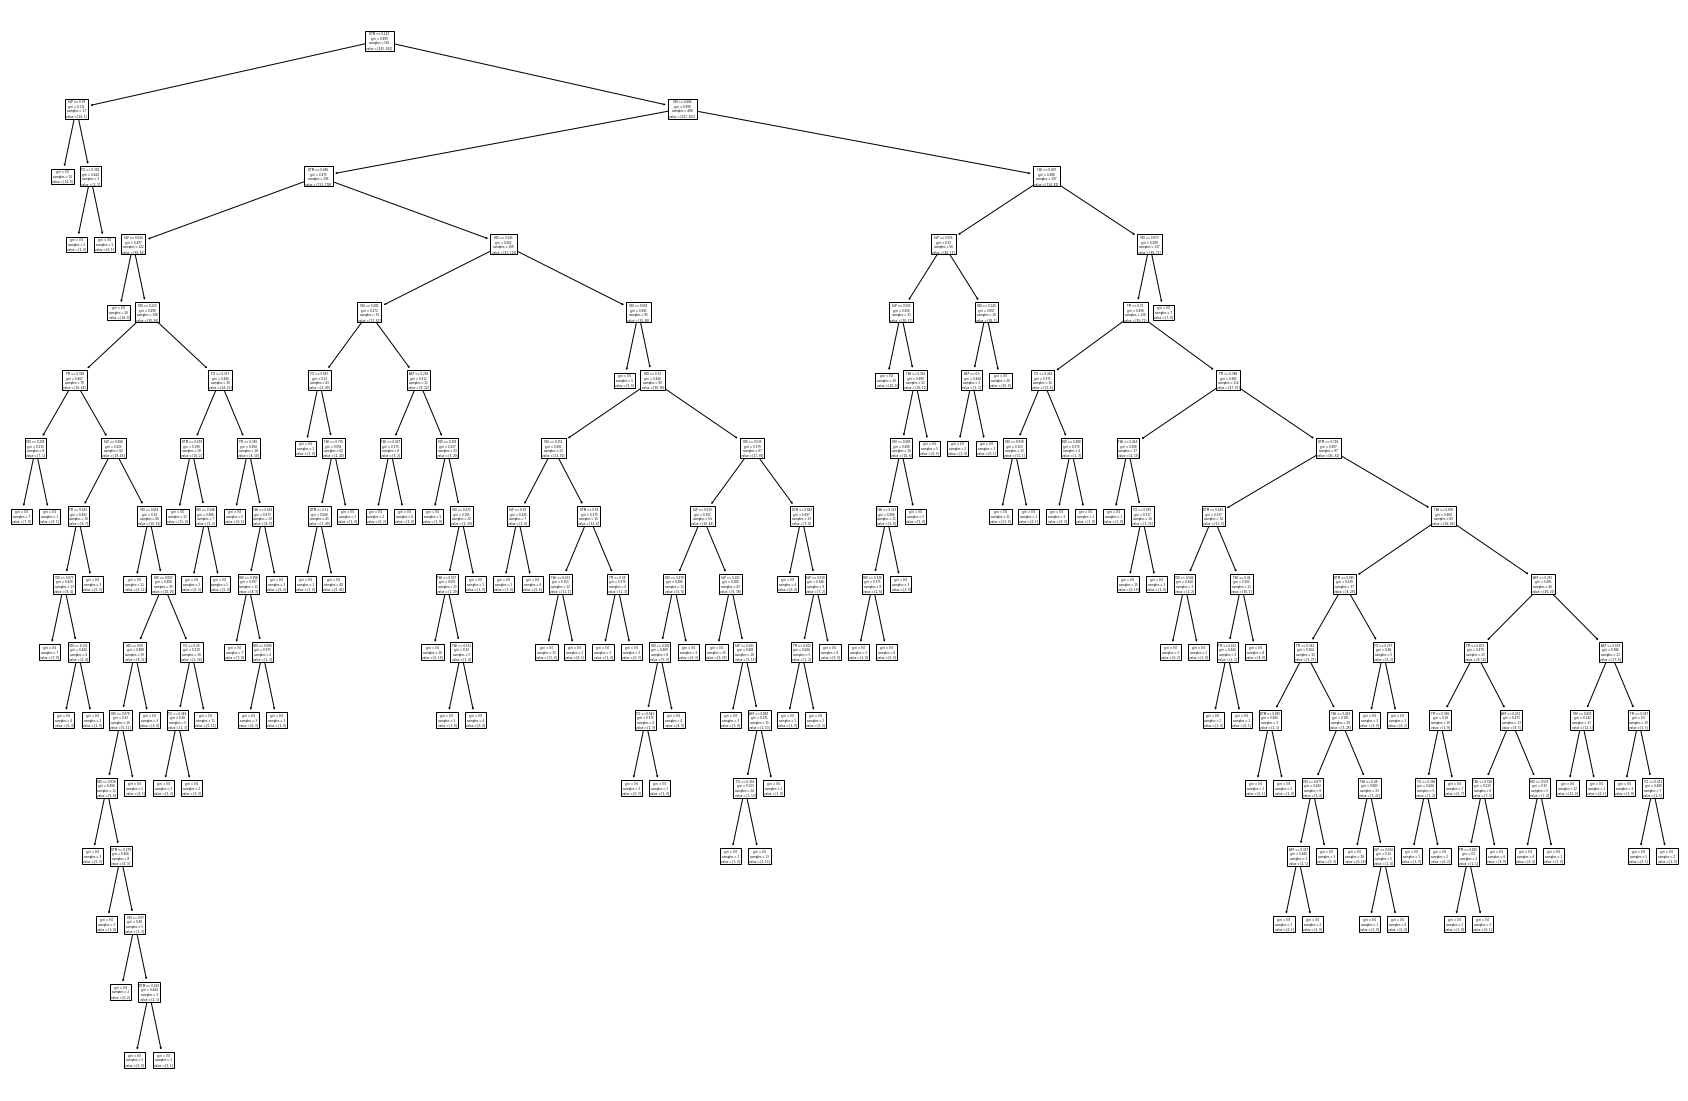

In [19]:
plot_tree(classificador,feature_names=dados.columns[1:])
plt.show()

## Comentários:


In [21]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (8,6)

In [22]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0.])

In [23]:
for i in range(len(y_test)):
  print(y_test.iloc[i],'\t',classificacao[i])

1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 1.0
0.0 	 1.0
1.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 1.0
1.0 	 1.0
1.0 	 1.0
0.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 1.0
1.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 1.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
1.0 	 0.0
1.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 0.0
0.0 	 1.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
1.0 	 0.0
0.0 	 1.0
1.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 1.0
1.0 	 0.0
1.0 	 1.0
0.0 	 1.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 1.0
1.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0


## 7. Avaliação do classificador

In [24]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [32]:
acuracia = accuracy_score(y_test,classificacao)
acuracia

0.6141732283464567

In [26]:
#calculando precisão
from sklearn.metrics import precision_score

In [27]:
precisao = precision_score(y_test,classificacao)
precisao

0.543859649122807

In [28]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [29]:
recall = recall_score(y_test,classificacao)
recall

0.5740740740740741

In [30]:
#calculando f1-score
from sklearn.metrics import f1_score

In [31]:
f1 = f1_score(y_test,classificacao)
f1

0.5585585585585585

In [33]:
#plotando curva roc
from sklearn.metrics  import roc_curve

In [34]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

In [30]:
fpr

array([0.        , 0.53731343, 1.        ])

In [35]:
tpr

array([0.        , 0.57407407, 1.        ])

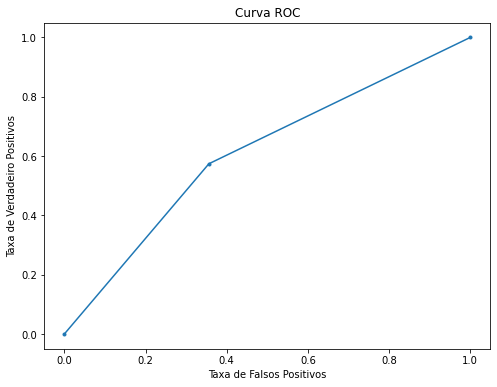

In [36]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## Área sob a curva (*Area under the curve - AUC)*

In [37]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [38]:
erro = roc_auc_score(y_test,classificacao)
erro

0.6089548452562151

## **Comentários**: 
Como o dataset se encontram balanceados, acurácia (taxa de acerto) pode ser utilizada sem maiores ressalvas. 
Contudo todas as métricas de avaliação do modelo apreserntaram valores não muito distantes da aleatorieadade (50%). 
Acurácia: 61,42%
Precisão: 54,39%
Recall : 57.41%
F1-score : 56,86%
A curva ROC se apresenta próxima à diagonal, porém com uma leve inflexão, sugerindo que a "qualidade" que o modelo gerado apresenta é timidamente superior à aleatoriedade, corroborada pelo valor AUC de 60,9%

## Validação Cruzada

In [39]:
# montando os folds para validação cruzada
from sklearn.model_selection import KFold

In [42]:
kf = KFold(n_splits=5)

In [43]:
#imprimindo os indices das instancias do treino e teste
for train,test in kf.split(X):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362 363 364 365 366 367 368 369 370 37

In [44]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [45]:
#define modelo
classificador = DecisionTreeClassifier()

In [46]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.546875  , 0.46875   , 0.63492063, 0.71428571, 0.53968254,
       0.46031746, 0.50793651, 0.65079365, 0.57142857, 0.52380952])

In [47]:
scores.mean(),scores.std()

(0.5618799603174602, 0.0778617580972846)

## **Comentários**:
Utilizando a Validação cruzadfa, foi possivel observar um valor de 56,69% como média da avaliação do classificador (com máximo de 71,43% e mínimo de 46,03%)
Portanto a valliidação cruizada forneceu um valor da avaliação do modelo da magnetude das métricas anteioirmente vverificadas.

## 7. Comparando Árvore de Decisão com Random Forest

## Método Holdout

In [77]:
#definindo árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
#definindo random forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100, random_state=7)
floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [85]:
#calculando acurácia da árvore de decisão
arvore.score(X_test,y_test)

0.5984251968503937

In [86]:
#realizando previsão com árvore de decisão
clf_arvore = arvore.predict(X_test)

In [87]:
#realizando previsão com random forest
clf_floresta = floresta.predict(X_test)

In [88]:
#calculando curva roc da árvore de decisão
fpr_ar, tpr_ar, _ = roc_curve(y_test,clf_arvore)

In [89]:
#calculando curva roc da random forest
fpr_fl, tpr_fl, _ = roc_curve(y_test,clf_floresta)

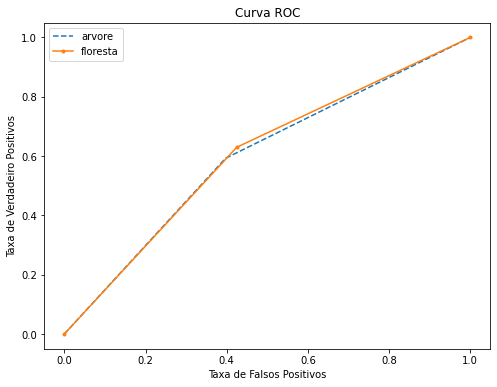

In [90]:
#plotando curvas
plt.plot(fpr_ar,tpr_ar,linestyle='--',label='arvore')
plt.plot(fpr_fl,tpr_fl,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

## **Comentários:**
Utilizando o algoritmo HoldOut, percebe-se a avaliação da árvore de decisão (59,84%) valores de magnitude compatível com as avaliações anterioires e mesmo a curva ROC indica pouca superioridade da floresta sobre a árvore.

## Validação Cruzada

In [91]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores = cross_val_score(arvore,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.562, 0.077)

In [92]:
#criando árvore
floresta = RandomForestClassifier()

#calculando os scores
scores = cross_val_score(floresta,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.576, 0.084)

## **Comentários:**
O resultado obtidos através da validação cruzada fornece o valor de 57,6%.
Logo, pelos resultados das avaliação dos classificadores (próximos ao 50% - aleatoriedade) os atributos topográficos utilizados são pouco representativos na modelagem da incidência de AEs na Amazônia Brasileira. Sugere-se, portanto, o uso adicional de variáveis ambientais oriunda outras fontes tais como clima, pedologia, dentre outras.